In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /Users/admin/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

In [4]:
df = pd.read_csv(os.path.join(path, "insurance.csv"))
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Part 1: Basic EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
print(df["sex"].value_counts())
print(df["smoker"].value_counts())
print(df["region"].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

**Basic EDA**

This dataset contains **1,338 entries** and **7 columns**, with no missing values across any of the columns.  
The data types include:  
- **Integers:** `age`, `children`  
- **Floats:** `bmi`, `charges`  
- **Categorical:** `sex`, `smoker`, `region`  

**Categorical Features**
- **Sex:** nearly balanced between male and female.  
- **Smoker:** majority are non-smokers.  
- **Region:** fairly even distribution, with the southeast slightly higher.  

**Numerical Features**
- **Age:** ranges from 18 to 64, with a mean of about 39.  
- **BMI:** ranges from ~16 to 53, mean ≈ 30.7.  
- **Children:** ranges from 0 to 5, mean ≈ 1.  
- **Charges:** highly variable, from ~1,122 to 63,770


### Part 2: Pairplot

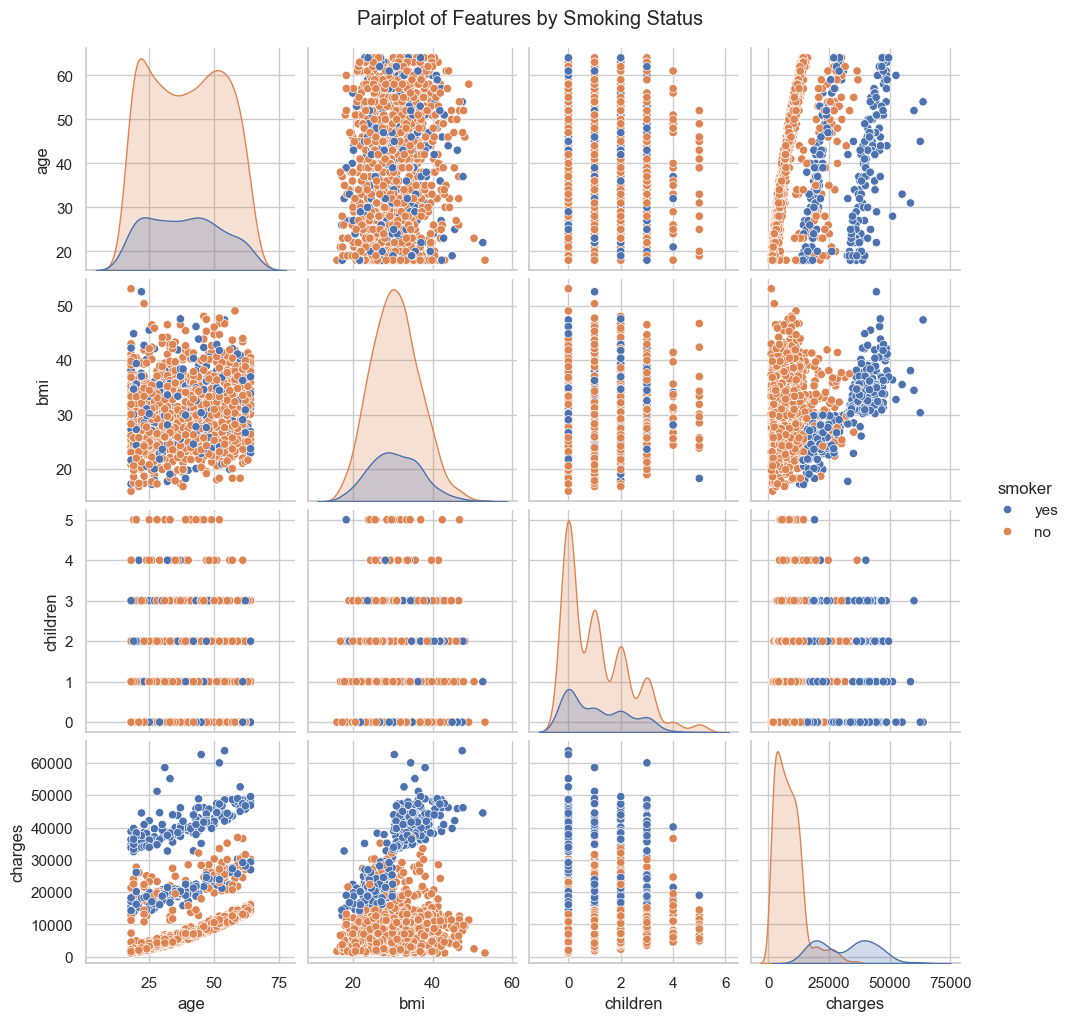

In [20]:
sns.pairplot(df, hue="smoker")
plt.suptitle("Pairplot of Features by Smoking Status", y=1.02)
plt.show()

**Pairplot Analysis:**

**Observations:**
 - Charges vs Age and BMI:
   - Smokers have much higher charges compared to nonsmokers, regardless of bmi or age.
   - The large cluster of high charges only exists in the smokers data.
 - Age Distribution:
     - Both smokers and nonsmokers are distributed throughout all ages.
     - There are no significant differences between the age groups.
 - BMI Distribution:
   - Smokers and nonsmokers have similar BMI distributions
   - Charges increase more in smokers with higher BMI
 - Children vs Charges:
   - The number of children does not affect charges.
 - Outliers:
   - There are a few smokers that stand out with extremely high charges.
     
**Conclusion:**
 - The pairplot highlights smoking as the most important factor in determination of insurance charges. Age and BMI have smalelr influence, as their effects being emphasized by the smokers.  


### Part 3: Personal Visualizations 

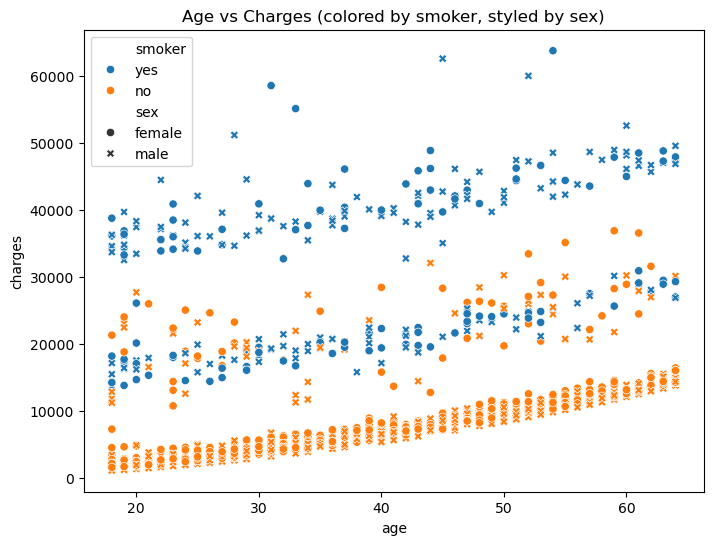

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", style="sex")
plt.title("Age vs Charges (colored by smoker, styled by sex)")
plt.show()

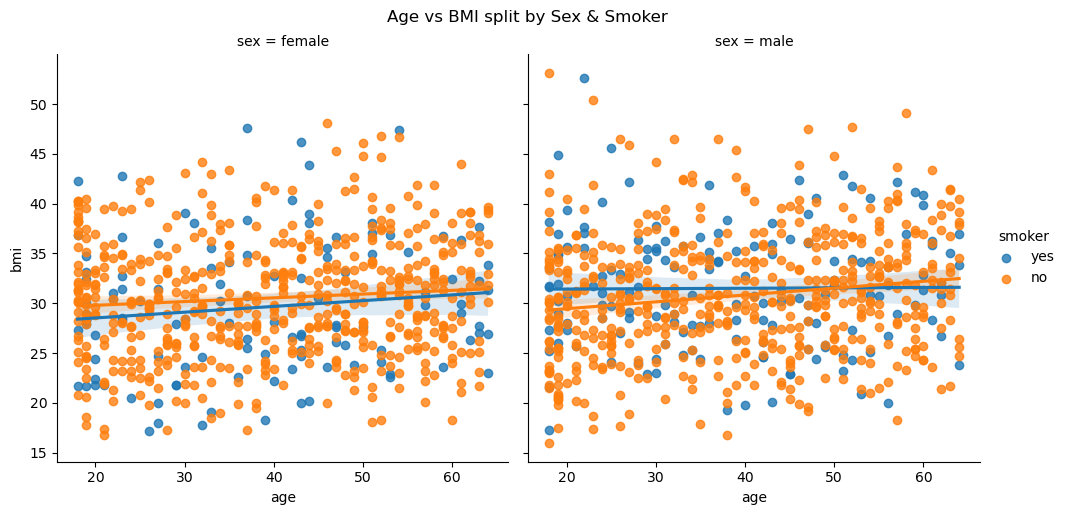

In [14]:
sns.lmplot(data=df, x="age", y="bmi", hue="smoker", col="sex", height=5)
plt.suptitle("Age vs BMI split by Sex & Smoker", y=1.02)
plt.show()

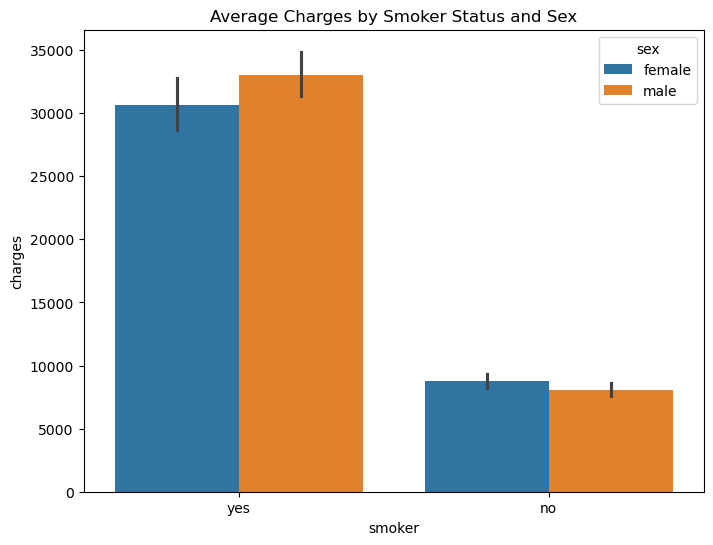

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="smoker", y="charges", hue="sex", estimator="mean")
plt.title("Average Charges by Smoker Status and Sex")
plt.show()

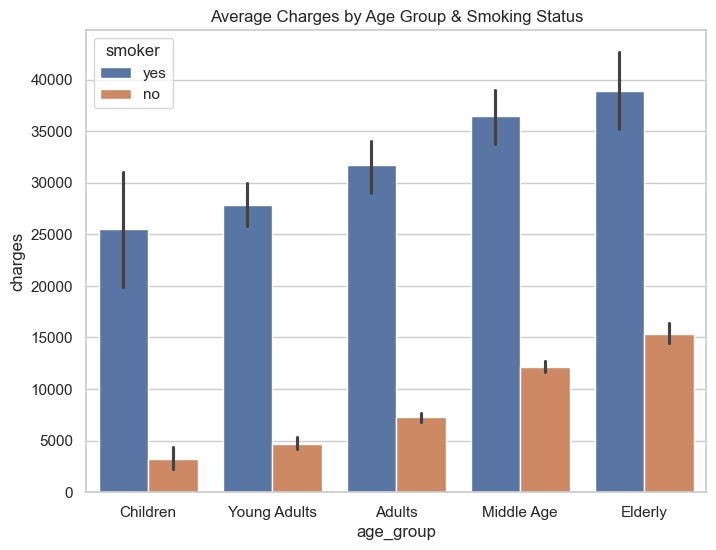

In [22]:
age_bins = [0,18,30,45,60,100]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=["Children","Young Adults","Adults","Middle Age","Elderly"])

plt.figure(figsize=(8,6))
sns.barplot(data=df, x="age_group", y="charges", hue="smoker", estimator="mean")
plt.title("Average Charges by Age Group & Smoking Status")
plt.show()

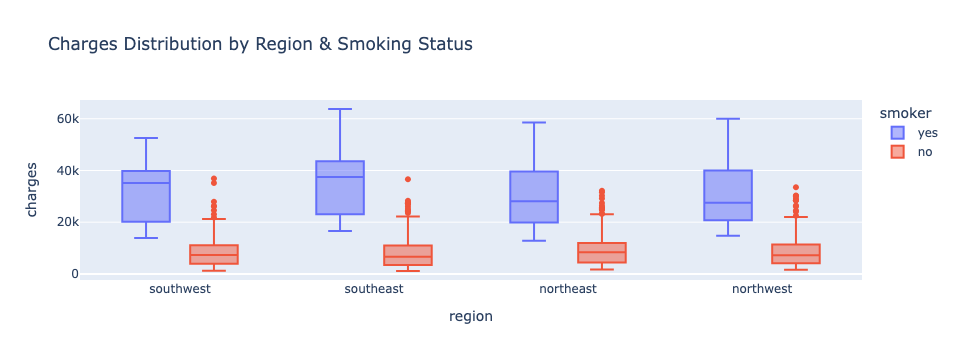

In [18]:
fig = px.box(df, x="region", y="charges", color="smoker", 
             title="Charges Distribution by Region & Smoking Status")
fig.show()

In [26]:
source = ColumnDataSource(df)
p = figure(title="BMI vs Charges (Bokeh)", 
           x_axis_label="BMI", y_axis_label="Charges", 
           width=700, height=400)

p.scatter(x="bmi", y="charges", source=source, size=6, alpha=0.5, color="navy")
show(p)

**Age vs Charges**
This scatterplot shows that smokers consistently have higher charges than non-smokers across all ages. The gap widens with age, and smoking clearly dominates costs regardless of sex.

**Age vs BMI by Sex and Smoker Status**
Looking at BMI across ages, there is no strong trend of BMI increasing with age. However, separating by smoker status and sex highlights that the relationship between BMI and charges is more pronounced for smokers.

**Average Charges by Smoker Status and Sex**
On average, smokers pay much higher charges than non-smokers. The difference between male and female charges within each smoking group is small compared to the smoker vs. non-smoker gap.

**Average Charges by Age Group & Smoking Status**
Breaking charges into age groups shows that charges rise with age for both smokers and non-smokers, but the increase is far steeper for smokers. Elderly smokers have the highest costs overall, while children and young adults have the lowest.

**Charges by Region & Smoking Status**
Charges are higher for smokers in every region, but the regional effect is relatively small compared to smoking status. All four regions show a similar pattern.

**BMI vs Charges (Bokeh Interactive Plot)**
The interactive scatterplot confirms that higher BMI is associated with higher charges, particularly among the most expensive outliers. Most of these high-cost points are smokers, reinforcing smoking as the primary driver of extreme charges.


## Conclusion

Smoking stands out as the biggest driver of higher charges, while age and BMI also add to costs, especially for smokers. Regional effects are minor compared to these factors. Overall, lifestyle choices matter more than location for medical expenses.
